<a href="https://colab.research.google.com/github/mrudulamadhavan/My-Projects/blob/main/User%20Indent%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Intent Classification**

Intent detection is a crucial component of most Conversational AI systems’ Natural Language Understanding (NLU) pipeline. To respond appropriately, virtual agents must accurately grasp the user’s intent.


Therefore, our task **focuses on building a machine learning model capable of precisely predicting user intent.**


In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv("sofmattress_train.csv")
df.head()

,sentence,label
0,You guys provide EMI option?,EMI
1,Do you offer Zero Percent EMI payment options?,EMI
2,0% EMI.,EMI
3,EMI,EMI
4,I want in installment,EMI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  328 non-null    object
 1   label     328 non-null    object
dtypes: object(2)
memory usage: 5.3+ KB


* The dataset consists of 328 samples, each containing a text sentence and its corresponding intent label.
* There is no missing values in the dataset.
* The features are of object datatype.

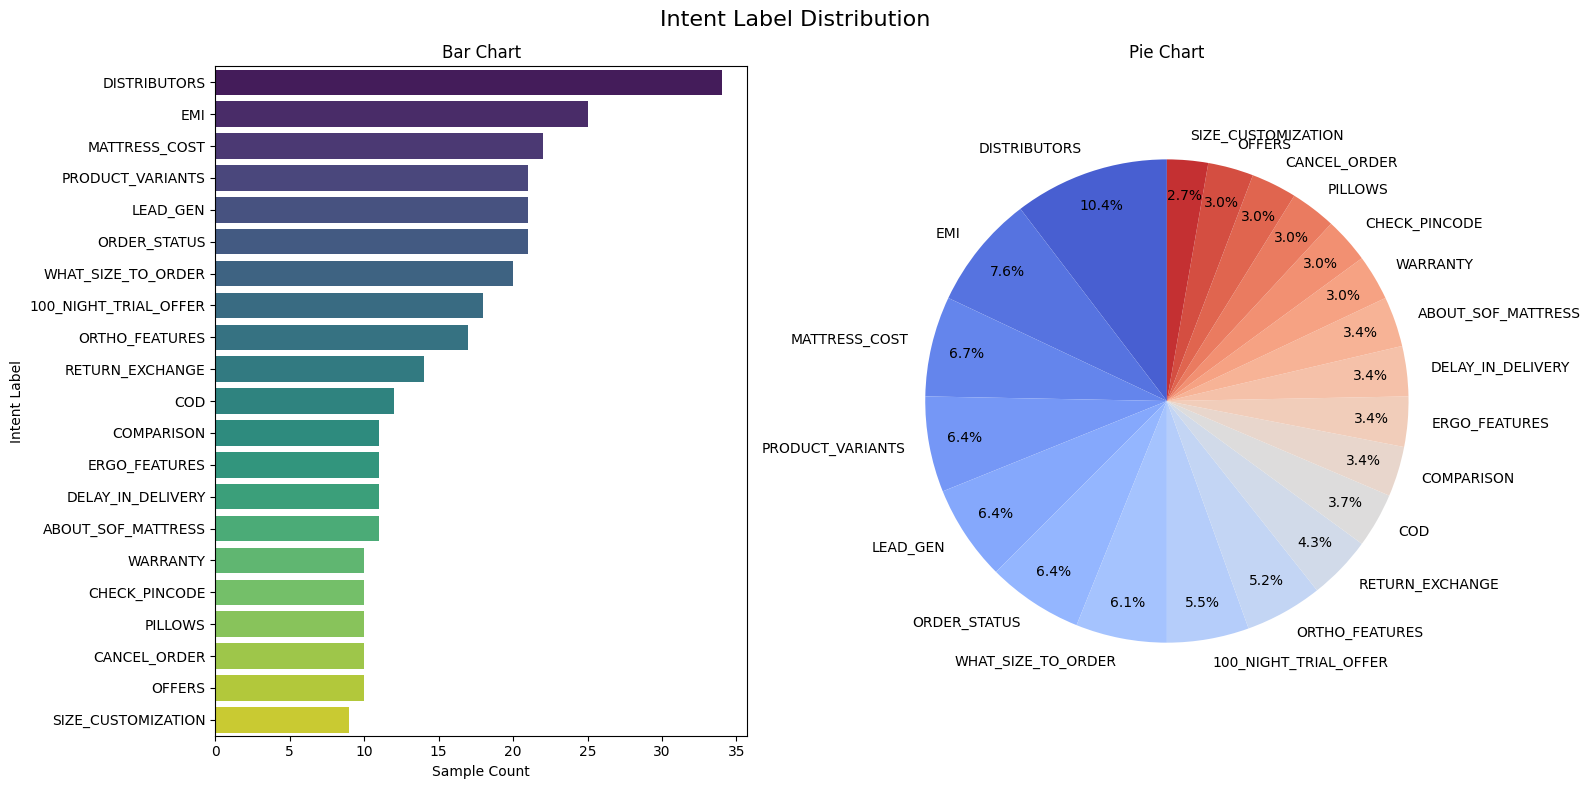

In [ ]:
# Intent Label Distribution

label_counts = df['label'].value_counts()
label_df = label_counts.reset_index()
label_df.columns = ['label', 'count']

# Plot side-by-side bar chart and pie chart
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Intent Label Distribution", fontsize=16)

# Horizontal Bar Chart
sns.barplot(data=label_df, x='count', y='label', palette='viridis', ax=axs[0],hue = 'label')
axs[0].set_title("Bar Chart")
axs[0].set_xlabel("Sample Count")
axs[0].set_ylabel("Intent Label")

# Pie Chart
axs[1].pie(label_df['count'], labels=label_df['label'], autopct='%1.1f%%',pctdistance=0.85, startangle=90, colors=sns.color_palette("coolwarm", len(label_df)))
axs[1].axis('equal')  # Make pie chart circular
axs[1].set_title("Pie Chart")

plt.tight_layout()
plt.show()


In [ ]:
df.label.unique()

array(['EMI', 'COD', 'ORTHO_FEATURES', 'ERGO_FEATURES', 'COMPARISON',
       'WARRANTY', '100_NIGHT_TRIAL_OFFER', 'SIZE_CUSTOMIZATION',
       'WHAT_SIZE_TO_ORDER', 'LEAD_GEN', 'CHECK_PINCODE', 'DISTRIBUTORS',
       'MATTRESS_COST', 'PRODUCT_VARIANTS', 'ABOUT_SOF_MATTRESS',
       'DELAY_IN_DELIVERY', 'ORDER_STATUS', 'RETURN_EXCHANGE',
       'CANCEL_ORDER', 'PILLOWS', 'OFFERS'], dtype=object)

### **Intent Detection as a Machine Learning Task (Multiclass Classification)**

* Intent detection can be framed as a **supervised multiclass classification problem.**

> * Input: Natural language sentence
> * Output: Predicted intent (e.g., "ORDER_STATUS", "WARRANTY")


* Each user query (input text) is associated with one intent (label) from a predefined set of intent classes.

* The goal is to train a model on labeled examples (sentences with known intents) so it can predict the intent of new, unseen user queries.

* The input features are typically text representations derived from the sentences (e.g., TF-IDF vectors, word embeddings).

* The output is one discrete class label indicating the predicted intent.

> | Component     | ML Equivalent                                |
| ------------- | -------------------------------------------- |
| User query    | Input feature (raw text)                     |
| Intent label  | Target variable (e.g., `EMI`, `COD`, etc.)   |
| Model         | Classifier (e.g., Logistic Regression, BERT) |
| Training data | Labeled dataset (sentence + intent)          |



### **Classifiers to use for Intent Detection (Multiclass Classification)**
Logistic Regression

> * Pros: Simple, fast to train, interpretable, good baseline
> * Cons: May underperform with complex text, linear decision boundary

Support Vector Machine (SVM)

> * Pros: Effective in high-dimensional spaces (like text), good with smaller datasets
> * Cons: Can be slower to train on very large datasets, tuning parameters can be tricky

Random Forest / Decision Trees

> * Pros: Handles non-linearity, interpretable feature importance
> * Cons: Less commonly used directly on raw text; requires good feature engineering

Naive Bayes (MultinomialNB)

> * Pros: Very fast, works well with text data, simple probabilistic interpretation
> * Cons: Assumes feature independence (which is not true for language), may be less accurate

Deep Learning Models (e.g., LSTM, CNN)

> * Pros: Can capture context and complex patterns in text
> * Cons: Requires more data, computationally intensive, harder to interpret

Transformer-based Models (e.g., BERT, RoBERTa)

> * Pros: State-of-the-art performance, contextual understanding of language
> * Cons: Computationally expensive, needs fine-tuning, more complex to deploy

### **Possible pros & cons of different formulations**

>| Formulation             | Pros                                             | Cons                                                                  |
| ----------------------- | ------------------------------------------------ | --------------------------------------------------------------------- |
| TF-IDF + ML classifiers | Fast, interpretable, works well with enough data | Limited context capture                                               |
| BERT Fine-Tuning        | State-of-the-art performance, context-aware      | Needs more data & compute                                             |
| LSTM                    | Captures sequential dependencies                 | Needs more tuning, less effective than transformers on small datasets |


## **Model Development**

* **Text encoding:** Use TF-IDF to vectorize the user sentences.

* **Label encoding:** Use LabelEncoder to convert intent labels into integers.

In [ ]:
# Text Preprocessing
import string
import re
import nltk
nltk.download('punkt_tab')

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Function to process the textual data
def preprocessing(text):
 regex = re.compile('[^a-zA-Z ]')
 text = regex.sub('', text)
 text = word_tokenize(text)
 text = [token for token in text if token not in set(string.punctuation)]
 text = [token for token in text if token.lower() not in stopwords.words('english')]
 lem = WordNetLemmatizer()
 text = [lem.lemmatize(token).lower() for token in text]
 return ' '.join(text)


In [ ]:
#Processing all articles
df["sentence"] = df["sentence"].apply(lambda x : preprocessing(x))

In [ ]:
#Encoding the target variable 'label'

from sklearn.preprocessing import LabelEncoder

# Save original labels before encoding
labels = df['label'].copy()

# Encode labels
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

# Create a DataFrame showing actual and encoded labels side by side for each row
label_mapping_df = pd.DataFrame({
    'Actual Label': labels,
    'Encoded Label': df['encoded_label']
})

# Calculate value counts for each label
value_counts = labels.value_counts()

# Create summary DataFrame for label -> encoded integer -> value counts
mapping_df = pd.DataFrame({
    'Actual Label': le.classes_,
    'Encoded Label': range(len(le.classes_)),
    'Value Counts': [value_counts[label] if label in value_counts else 0 for label in le.classes_]
})

print("Label to Encoded Integer mapping with Value Counts:\n")
mapping_df

Label to Encoded Integer mapping with Value Counts:



,Actual Label,Encoded Label,Value Counts
0,100_NIGHT_TRIAL_OFFER,0,18
1,ABOUT_SOF_MATTRESS,1,11
2,CANCEL_ORDER,2,10
3,CHECK_PINCODE,3,10
4,COD,4,12
5,COMPARISON,5,11
6,DELAY_IN_DELIVERY,6,11
7,DISTRIBUTORS,7,34
8,EMI,8,25
9,ERGO_FEATURES,9,11


In [ ]:
df.sample(10)

,sentence,label,encoded_label
200,cost mattress,MATTRESS_COST,11
18,paisa finance available,EMI,8
299,cancel order,CANCEL_ORDER,2
174,showroom,DISTRIBUTORS,7
252,month,DELAY_IN_DELIVERY,6
166,retailer pune city,DISTRIBUTORS,7
278,status,ORDER_STATUS,13
221,product variants,PRODUCT_VARIANTS,16
67,difference product,COMPARISON,5
171,showroom,DISTRIBUTORS,7


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Extract features using different methods - Binary or Bag of Words or TF-IDF
def extract_features(df,feature,train,test,vectorization_method="binary"):

    if "binary" in vectorization_method:
        # BINARY
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(train[feature].values)
        train_feature_set=cv.transform(train[feature].values)
        test_feature_set=cv.transform(test[feature].values)
        return train_feature_set,test_feature_set,cv

    elif "bow" in vectorization_method:
        # Bag Of Words
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(train[feature].values)
        train_feature_set=cv.transform(train[feature].values)
        test_feature_set=cv.transform(test[feature].values)
        return train_feature_set,test_feature_set,cv

    elif 'tfidf' in vectorization_method:
        # TF-IDF
        tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
        tfidf_vectorizer.fit_transform(train[feature].values)
        train_feature_set=tfidf_vectorizer.transform(train[feature].values)
        test_feature_set=tfidf_vectorizer.transform(test[feature].values)
        return train_feature_set,test_feature_set,tfidf_vectorizer
    else:
        pass


In [ ]:
data = df[["sentence","encoded_label"]]
df1 = data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentence       328 non-null    object
 1   encoded_label  328 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test (stratified to preserve label distribution)
train, test = train_test_split(data, random_state=2000, test_size=0.25, stratify=df['encoded_label'])

# Labels
Y_train = train['encoded_label'].values
Y_test = test['encoded_label'].values

# TF-IDF feature extraction
X_train, X_test, feature_transformer_tfidf = extract_features(data, "sentence", train, test, vectorization_method="tfidf")

In [ ]:
print("Train size: ")
print(X_train.shape, Y_train.shape)
print("\nTest size: ")
print(X_test.shape, Y_test.shape)

Train size: 
(246, 177) (246,)

Test size: 
(82, 177) (82,)


## **Model Training & Performance**

> **NB : Class imbalance not considered**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score

# Dictionary to store model performance
performance = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision (Macro)': [],
    'Recall (Macro)': [],
    'F1 Score (Macro)': []
}

# Helper function to train, predict and store metrics
def evaluate_model(model, name):
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    train_acc = accuracy_score(Y_train, Y_pred_train)
    test_acc = accuracy_score(Y_test, Y_pred_test)
    precision, recall, f1, _ = precision_recall_fscore_support(Y_test, Y_pred_test, average='macro', zero_division=0)

    performance['Model'].append(name)
    performance['Train Accuracy'].append(train_acc)
    performance['Test Accuracy'].append(test_acc)
    performance['Precision (Macro)'].append(precision)
    performance['Recall (Macro)'].append(recall)
    performance['F1 Score (Macro)'].append(f1)

# Train models
evaluate_model(LogisticRegression(solver='liblinear', C=5,random_state=42), 'Logistic Regression')
evaluate_model(SVC(kernel='linear', C=1), 'Support Vector Machine')
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), 'Random Forest')
evaluate_model(MultinomialNB(), 'Naive Bayes')

# Display performance as DataFrame
performance_df = pd.DataFrame(performance)
performance_df = performance_df.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)
performance_df


,Model,Train Accuracy,Test Accuracy,Precision (Macro),Recall (Macro),F1 Score (Macro)
0,Logistic Regression,0.987805,0.878049,0.931606,0.853968,0.871123
1,Support Vector Machine,0.959350,0.829268,0.877015,0.804762,0.816387
2,Random Forest,0.991870,0.768293,0.915706,0.761111,0.790249
3,Naive Bayes,0.865854,0.768293,0.816156,0.696825,0.706134


* Logistic Regression with TF-IDF gave strong results due to the relatively small and clean dataset.
* Performance dipped when class imbalance was high, which aligns with expectation.

**NB : Considering class imbalance & best parameters after hyperparameter tuning, we have**

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Grid Search for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
grid_lr = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid_lr, cv=5, scoring='f1_macro')
grid_lr.fit(X_train, Y_train)
best_params_lr = grid_lr.best_params_

# 2. Grid Search for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(class_weight='balanced'), param_grid_svm, cv=5, scoring='f1_macro')
grid_svm.fit(X_train, Y_train)
best_params_svm = grid_svm.best_params_

# 3. Grid Search for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
grid_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid_rf, cv=5, scoring='f1_macro')
grid_rf.fit(X_train, Y_train)
best_params_rf = grid_rf.best_params_

# 4. Grid Search for Naive Bayes
param_grid_nb = {'alpha': [0.1, 0.5, 1.0]}
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='f1_macro')
grid_nb.fit(X_train, Y_train)
best_params_nb = grid_nb.best_params_

# Print best hyperparameters
print("Best parameters for Logistic Regression:", best_params_lr)
print("Best parameters for SVM:", best_params_svm)
print("Best parameters for Random Forest:", best_params_rf)
print("Best parameters for Naive Bayes:", best_params_nb)


Best parameters for Logistic Regression: {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}
Best parameters for Naive Bayes: {'alpha': 0.1}


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Helper function to train and evaluate model
def evaluate_model(name, model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    return {
        'Model': name,
        'Train Accuracy': accuracy_score(Y_train, model.predict(X_train)),
        'Test Accuracy': accuracy_score(Y_test, y_pred),
        'Precision (Macro)': precision_score(Y_test, y_pred, average='macro', zero_division=0),
        'Recall (Macro)': recall_score(Y_test, y_pred, average='macro', zero_division=0),
        'F1 Score (Macro)': f1_score(Y_test, y_pred, average='macro', zero_division=0)
    }

results = []

# 1. Logistic Regression with class_weight
lr_model = LogisticRegression(C=5, penalty='l2', solver='liblinear', random_state=42, class_weight='balanced')
results.append(evaluate_model('Logistic Regression', lr_model, X_train, Y_train, X_test, Y_test))

# 2. SVM with class_weight
svm_model = SVC(C=1, kernel='linear', gamma='scale', random_state=0, class_weight='balanced')
results.append(evaluate_model('SVM', svm_model, X_train, Y_train, X_test, Y_test))

# 3. Random Forest with SMOTE (no class_weight)
smote = SMOTE(random_state=0)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=10,
                                  max_features='log2', random_state=0)
results.append(evaluate_model('Random Forest (SMOTE)', rf_model, X_train_smote, Y_train_smote, X_test, Y_test))

# 4. Naive Bayes with SMOTE
smote = SMOTE(random_state=0)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)
nb_model = MultinomialNB(alpha=0.1)
results.append(evaluate_model('Naive Bayes (SMOTE)', nb_model, X_train_smote, Y_train_smote, X_test, Y_test))

# Results table
model_comparison_df = pd.DataFrame(results).sort_values(by='Test Accuracy', ascending=False)
model_comparison_df


,Model,Train Accuracy,Test Accuracy,Precision (Macro),Recall (Macro),F1 Score (Macro)
0,Logistic Regression,0.983740,0.841463,0.873443,0.825397,0.835838
1,SVM,0.955285,0.804878,0.860204,0.792063,0.805009
2,Random Forest (SMOTE),0.963810,0.804878,0.883333,0.782540,0.797939
3,Naive Bayes (SMOTE),0.984762,0.743902,0.773810,0.745767,0.739681


##**Model Evaluation**

In [ ]:
# 1. Stratified Train-Test Split
train, test = train_test_split(df1, random_state=2000, test_size=0.25, stratify=df['encoded_label'])

# 2. Labels
Y_train = train['encoded_label'].values
Y_test = test['encoded_label'].values

# 3. TF-IDF Feature Extraction
X_train, X_test, vectorizer = extract_features(df1, "sentence", train, test, vectorization_method="tfidf")

# 4. Train Logistic Regression
model = LogisticRegression(C=5, penalty='l2', solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train, Y_train)

# 5. Evaluation
Y_pred = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(Y_train, model.predict(X_train)):.4f}")
print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred):.4f}")


Train Accuracy: 0.9837
Test Accuracy : 0.8415



Classification Report:

                       precision    recall  f1-score   support

100_NIGHT_TRIAL_OFFER       1.00      0.75      0.86         4
   ABOUT_SOF_MATTRESS       1.00      1.00      1.00         3
         CANCEL_ORDER       1.00      1.00      1.00         2
        CHECK_PINCODE       0.60      1.00      0.75         3
                  COD       1.00      0.67      0.80         3
           COMPARISON       0.67      0.67      0.67         3
    DELAY_IN_DELIVERY       0.67      0.67      0.67         3
         DISTRIBUTORS       0.69      1.00      0.82         9
                  EMI       1.00      1.00      1.00         6
        ERGO_FEATURES       1.00      0.67      0.80         3
             LEAD_GEN       1.00      0.60      0.75         5
        MATTRESS_COST       1.00      1.00      1.00         6
               OFFERS       1.00      1.00      1.00         2
         ORDER_STATUS       1.00      0.80      0.89         5
       ORTHO_FEATURES       0

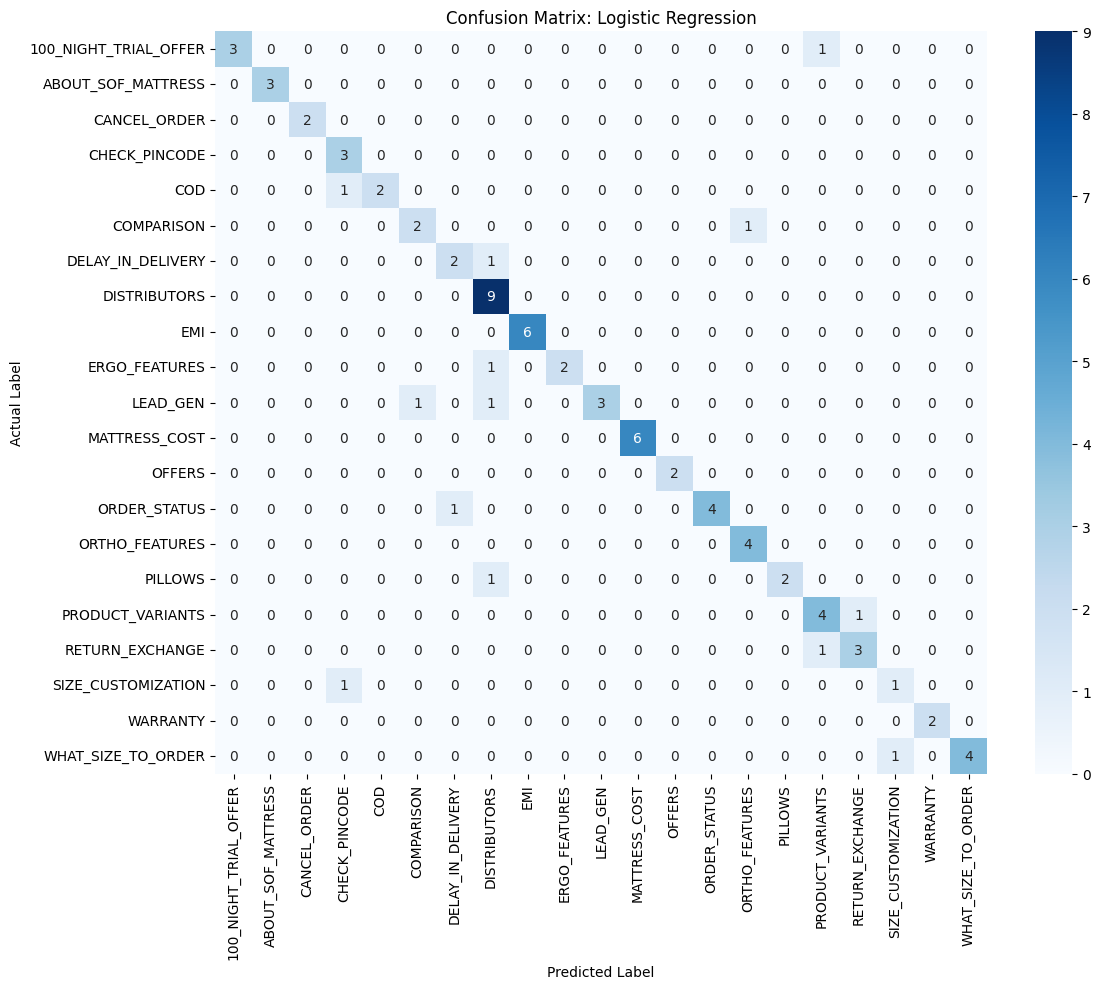

In [ ]:
# 6. Classification Report
print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred, target_names=le.classes_))

# 7. Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
# 8. USER QUERY PREDICTION
query = ["Can I cancel my order"]
query_tfidf = vectorizer.transform(query)
pred_label = model.predict(query_tfidf)
predicted_intent = le.inverse_transform(pred_label)

print(f"\nUser Query: {query[0]}")
print("Predicted Intent:", predicted_intent[0])


User Query: Can I cancel my order
Predicted Intent: CANCEL_ORDER


### **Key Takeaways**
* **Distinct lexical patterns across intents:** The strong performance of models such as Logistic Regression and SVM indicates that the intents exhibit clear differences in wording and structure, allowing effective learning using straightforward features like TF-IDF.

* **Improved fairness through class balancing:** Techniques like SMOTE and class weighting successfully mitigated bias toward majority classes, resulting in more balanced precision and recall scores across different intent categories.

* **Robust generalization with minimal overfitting:** The small difference between training and test accuracies demonstrates that the models generalize well to unseen data, reflecting both a well-prepared dataset and appropriate model complexity.

* **Model simplicity aligned with problem nature:** Framing intent detection as a multi-class classification with distinct labels suits linear and tree-based models, explaining the solid baseline results achieved.

* **Balanced performance despite class imbalance:** Precision, recall, and F1 scores remain strong for most classes, with only a few suffering from limited sample sizes—an expected pattern in real-world multi-class tasks.

* **Consistent model generalization:** Minimal training-to-testing accuracy gaps in Logistic Regression and SVM highlight reliable model performance without overfitting.

* **Positive effect of addressing class imbalance:** Improvements observed with SMOTE and class weights confirm initial model bias toward dominant classes and the effectiveness of these balancing techniques.

* **Sufficient lexical and semantic separation of intents:** The success of simple linear models indicates that the intent categories are distinguishable at both the lexical and semantic levels, even with basic TF-IDF vectorization.

## **Challenges for Intent Classification & Solutions**

🔑 1. Data Quality and Quantity

**Problems:**
* Imbalanced classes: Some intents have far fewer examples, making it harder for the model to learn them.
* Noisy labels: Incorrect or inconsistent labeling can confuse the model.
* Insufficient training data: Especially for new or niche intents, there's often not enough labeled data to train effectively.

**Solutions:**

* Data augmentation: Use paraphrasing, synonym replacement, back translation, or LLMs to create more diverse samples.
* Resampling: Apply techniques like SMOTE (oversampling) or undersampling to balance the classes.
* Active learning: Let the model query the most uncertain samples for human labeling.
* Data validation: Use heuristics or manual spot checks to reduce label noise.
----

🔄 2. Language Variability

**Problems:**
* Paraphrasing: Many ways to ask the same thing (e.g., "Where is my order?" vs. "Track my delivery").
* Slang & abbreviations: Users may type "EMI?" or "cash on delivery".
* Typos & misspellings: Real-world queries often contain mistakes.
* Code-mixed language: Mix of English and local languages (e.g., Hinglish: "order cancel karna hai").

**Solutions:**

* Text normalization: Expand contractions, correct spelling, and standardize tokens.
* Domain-specific vocabulary: Fine-tune models on data containing relevant lingo (e.g., “0% EMI”).
* Use of embeddings: Prefer pretrained word embeddings (e.g., BERT, fastText) that capture semantic similarity.
----

🌍 3. Domain Adaptability

**Problems:**
* A model trained for one domain (e.g., ecommerce) may perform poorly on another (e.g., healthcare).
* Custom intent sets require custom data collection and retraining.

**Solutions:**

* Transfer learning: Fine-tune general-purpose models like BERT on your specific domain.
* Domain adaptation: Train on mixed-domain data or use domain-invariant features.
* Custom pretraining: If possible, pretrain language models on your own domain corpus.
----

❓ 4. Out-of-Scope (OOS) Queries

**Problems:**
* Users may ask things not covered by any known intent (e.g., “Tell me a joke” in a banking bot).
* Detecting OOS reliably is non-trivial and important for fallback handling.

**Solutions:**

* Confidence thresholding: If prediction confidence < threshold, label as “Unknown” or OOS.
* Add an explicit OOS class: Train the model with real OOS examples labeled accordingly.
* Open-set classifiers: Explore methods like OpenMax, or distance-based anomaly detection on embeddings.
----

🧠 5. Ambiguous or Multi-Intent Queries

**Problems:**
* Ambiguity: “How long does it take?” — is it about shipping, delivery, or installation?
* Multi-intent: “Can I cancel and get a refund?” contains two intents.

**Solutions:**

* Human-in-the-loop: Route ambiguous queries for manual review.
* Multi-label classification: Allow a model to assign more than one intent if relevant.
* Intent clarification: Build follow-up questions into the bot (e.g., “Did you mean refund or cancellation?”).
----

🤖 6. Model Limitations

**Problems:**
* Overfitting: Especially when data is small or unbalanced.
* Interpretability: Deep models like BERT may be accurate but harder to explain.
* Latency: Real-time systems may need faster, lighter models.

**Solutions:**

* Regularization: Use dropout, weight decay, early stopping.
* Explainability tools: Use LIME or SHAP to understand model decisions.
* Model compression: Apply quantization or distillation to reduce latency in deep models.
* Benchmark simpler models like logistic regression may be good enough!

----

🧪 7. Evaluation Complexity

**Problems:**
* High accuracy might hide poor performance on minority intents.
* Macro metrics (precision, recall, F1) are better for assessing multiclass setups.

**Solutions:**

* Macro-averaged metrics: Report precision/recall/F1 per class.
* Confusion matrix analysis: Identify classes most often confused and augment accordingly.

----

🔧 8. Continuous Learning

**Problems:**
* New intents and variations constantly emerge.
* Updating models frequently without forgetting previous learning (catastrophic forgetting) is a challenge.

**Solutions:**

* Retrain periodically: On new labeled queries to stay up to date.
* Few-shot learning: Use models like T5 or GPT-4 that adapt well to small examples.


## **Improvements/Suggestions**

* **Incorporate contextual embeddings:** Using pretrained models like BERT or fine-tuned transformers can capture deeper semantic relationships beyond simple word patterns. This improves intent detection, especially for ambiguous or complex queries.

* **Handle multi-intent queries:** Extending the model to multi-label classification can better manage inputs that express multiple intents at the same time. This increases robustness in real-world situations.

* **Augment data for low-support classes:** Generating synthetic data or collecting targeted data for underrepresented intents will reduce class imbalance. This improves classification metrics for weaker classes.

* **Add out-of-scope detection:** Implementing threshold-based or separate out-of-distribution classifiers will help the system reject or flag queries that fall outside the trained intents. This enhances user experience.

* **Hyperparameter tuning and ensemble methods:** Careful optimization and combining multiple models can improve performance by reducing the biases and variance of individual models.



These improvements build on the current foundation by adding richer features, addressing real-world complexities, and expanding model capabilities, thus improving both accuracy and robustness without drastically increasing complexity.

-----------------
**Mrudula A P**